## Data analysis ##

In [4]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import textstat
import emoji
import re

In [5]:
# Define the base path to your CSV files
#base_path = '/Users/sandervanduin/Desktop/HVA weekly /Digitial Marketing Strategy/DMSteam9'
base_path = '/Users/owenalberts/Desktop/Master Digital Driven Business/Digital marketing strategy/DMSteam9'

# Explicitly load each CSV file into its own DataFrame
df1 = pd.read_csv(os.path.join(base_path, 'Themeparcs I.csv'), on_bad_lines='skip', delimiter=';')
df2 = pd.read_csv(os.path.join(base_path, 'Themeparcs II.csv'), on_bad_lines='skip', delimiter=';')
df3 = pd.read_csv(os.path.join(base_path, 'Themeparcs III.csv'), on_bad_lines='skip', delimiter=';')
df4 = pd.read_csv(os.path.join(base_path, 'Themeparcs IV.csv'), on_bad_lines='skip', delimiter=';')

# Example operation: print the first few rows of the DataFrame
merged_df = pd.concat([df1, df2, df3, df4], ignore_index=True)
print("First few rows of Merged Themeparcs :")
merged_df.head(5)

First few rows of Merged Themeparcs :


,Date,Profile,Message,Number of Reactions,Number of Shares,Number of Comments (primary),Number of Shares.1,Comments per post,Comments on posts by fans,Post interaction rate,Engagement,Number of Likes,Link-posts,Picture Posts,Video-posts,Profile-ID,Post-ID,Link
0,12/31/23 9:40 PM,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16.0,NaN,2.0,2.0,2.0,2.0,"1,09E+12","1090000000000,00",13.0,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...
1,12/31/23 8:01 PM,Fun Spot America,See you next year! 😉 Don’t miss...,38.0,NaN,1.0,2.0,1.0,1.0,"4,17E+11","417000000000,00",33.0,NaN,NaN,NaN,"1,84E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...
2,12/31/23 7:30 PM,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23.0,NaN,2.0,3.0,2.0,2.0,"2,85E+11","285000000000,00",21.0,NaN,NaN,1.0,"1,84E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...
3,12/31/23 7:00 PM,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646.0,NaN,52.0,12.0,56.0,56.0,"1,36E+11","136000000000,00",478.0,NaN,1.0,NaN,"6,52E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...
4,12/31/23 7:00 PM,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17.0,NaN,2.0,0.0,2.0,2.0,"4,96E+11","496000000000,00",16.0,NaN,NaN,1.0,"7,63E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...


In [6]:
# Display the DataFrame's information, including index dtype and columns, non-null values, and memory usage
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15443 entries, 0 to 15442
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          15443 non-null  object 
 1   Profile                       15443 non-null  object 
 2   Message                       15443 non-null  object 
 3   Number of Reactions           15443 non-null  float64
 4   Number of Shares              0 non-null      float64
 5   Number of Comments (primary)  15443 non-null  float64
 6   Number of Shares.1            15443 non-null  float64
 7   Comments per post             15443 non-null  float64
 8   Comments on posts by fans     15443 non-null  float64
 9   Post interaction rate         15443 non-null  object 
 10  Engagement                    15443 non-null  object 
 11  Number of Likes               15443 non-null  float64
 12  Link-posts                    555 non-null    float64
 13  P

In [7]:
# Assuming your DataFrame is named df
unique_profiles = merged_df.drop_duplicates(subset=['Profile-ID'])

# Print the unique profiles
unique_profiles[['Profile', 'Profile-ID']].head(5)

,Profile,Profile-ID
0,Wild Adventures Theme Park,84679583132
1,Fun Spot America,"1,84E+11"
3,Disneyland Paris,"6,52E+14"
4,Silverwood Theme Park,"7,63E+14"
5,Belmont Park,83231004302


In [8]:
# Counts of unique values for a specific column
merged_df['Profile'].value_counts().head(5)

Profile
Wild Adventures Theme Park    955
Happy Hollow Park & Zoo       627
Cedar Point                   478
Walt Disney Studios (US)      450
Playland                      446
Name: count, dtype: int64

In [9]:
# Assuming merged_df is your DataFrame

# Sum up the number of reactions for each profile
reactions_sum = merged_df.groupby(['Profile', 'Profile-ID'])['Number of Reactions'].sum().reset_index()

# Sort profiles by the number of reactions in descending order and get the top 100
top_profiles = reactions_sum.sort_values('Number of Reactions', ascending=False).head(100)

top_profiles.head(10)


,Profile,Profile-ID,Number of Reactions
54,Walt Disney Animation Studios,23245476854,1745666.0
55,Walt Disney Studios (US),"1,11E+14",1343887.0
13,Disneyland,11081890741,540414.0
52,Universal Orlando Resort (US),90867402851,434662.0
56,Walt Disney World,"1,56E+11",426506.0
4,Busch Gardens Tampa Bay,68181225238,289953.0
11,Cedar Point,10625691462,256408.0
53,Universal Studios Hollywood,61784580148,236426.0
34,Santa Cruz Beach Boardwalk,40035168377,222131.0
22,Hersheypark,16994689356,209908.0


In [10]:
# Count the number of unique 'Disneyland' profiles based on unique 'Profile-ID's
disneyland_unique_count = merged_df[merged_df['Profile'] == 'Nagashima Spa Land'].drop_duplicates(subset=['Profile-ID']).shape[0]

disneyland_unique_count


0

In [11]:
# Filter the DataFrame for rows where 'Profile' contains 'Disneyland' (case-insensitive)
# and drop duplicates based on 'Profile-ID' to ensure uniqueness
disneyland_like_unique_profiles = merged_df[merged_df['Profile'].str.contains('Disneyland', case=False, na=False)].drop_duplicates(subset=['Profile-ID'])

# Count the number of unique profiles that contain 'Disneyland'
disneyland_like_unique_count = disneyland_like_unique_profiles.shape[0]

disneyland_like_unique_count


2

In [12]:
# Counts of unique values for a specific column
merged_df['Number of Reactions'].value_counts()

Number of Reactions
6.0       207
4.0       206
3.0       201
5.0       200
1.0       193
         ... 
1094.0      1
1912.0      1
2545.0      1
2566.0      1
707.0       1
Name: count, Length: 1866, dtype: int64

In [13]:
# Mean or average of a column
print(merged_df['Number of Reactions'].mean())

# Median of a column
print(merged_df['Number of Reactions'].median())

494.2829113514214
67.0


In [14]:
# Fill NaN values with 0 for calculation
merged_df['Number of Shares'] = merged_df['Number of Shares'].fillna(0)
# merged_df['Number of Shares.1'] = merged_df['Number of Shares.1'].fillna(0)

# Calculate total shares by summing both shares columns
merged_df['total_shares'] = merged_df['Number of Shares'] + merged_df['Number of Shares.1']

# Now group by 'Profile' and sum the 'Total Shares', and then sort the sums in ascending order
shares_per_profile = merged_df.groupby('Profile')['total_shares'].sum().sort_values(ascending=False)

shares_per_profile.head(5)

Profile
Walt Disney Animation Studios    227392.0
Walt Disney Studios (US)         118026.0
Universal Orlando Resort (US)     76962.0
Walt Disney World                 59715.0
Disneyland                        51015.0
Name: total_shares, dtype: float64

## Creating our dependent variable

Unweighted engagement score ---> consisting of:
- `"Number of reactions"`
- `"total_shares"`
- `"Number of Comments (primary)"`
- `"Number of Likes"`

In [15]:
# Function to calculate the average excluding zeros, unless all values are zero
def calculate_unweighted_average(row):
    values = [row['Number of Reactions'], row['total_shares'], row['Number of Comments (primary)'], row['Number of Likes']]
    # Remove zeros but only if not all values are zeros
    filtered_values = [value for value in values if value != 0] or values
    return np.mean(filtered_values)
 
# Apply the function to each row in the DataFrame
merged_df['Unweighted_Engagement_Score'] = merged_df.apply(calculate_unweighted_average, axis=1)
 
# Display the first few rows to verify the changes
merged_df[['Date', 'Profile', 'Message', 'Number of Reactions', 'total_shares', 'Number of Comments (primary)', 'Number of Likes', 'Unweighted_Engagement_Score']].head()

,Date,Profile,Message,Number of Reactions,total_shares,Number of Comments (primary),Number of Likes,Unweighted_Engagement_Score
0,12/31/23 9:40 PM,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16.0,2.0,2.0,13.0,8.250000
1,12/31/23 8:01 PM,Fun Spot America,See you next year! 😉 Don’t miss...,38.0,2.0,1.0,33.0,18.500000
2,12/31/23 7:30 PM,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23.0,3.0,2.0,21.0,12.250000
3,12/31/23 7:00 PM,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646.0,12.0,52.0,478.0,297.000000
4,12/31/23 7:00 PM,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17.0,0.0,2.0,16.0,11.666667


## Feature Engineering per Sub-Question

#### Sub_Question 1:
- "What content features (e.g., visual elements, text, use of hashtags) are associated with higher engagement rates in theme park brand posts on Facebook?"

#### Sub_Question 2:

#### Sub_Question 3:

#### Sub_Question 4:

######################

### Sub Question 1

##### "What content features (e.g., visual elements, text, use of hashtags) are associated with higher engagement rates in theme park brand posts on Facebook?"

`Making new features`
- `Number of hashtags`
- `Text readability`
- `Readability score`
- `Emoji count`



In [16]:
# Making new features out of "Message" column
# -->  Count the number of hashtags in each message ----- Number of hashtags
# -->  Count the number of characters in each message ----- Text readability
# -->  Using Flesch Reading Ease formula ----- Readability score
# -->  Count the number of emojis in each message ----- Emoji count


# Count the number of characters in each message
merged_df['text_length'] = merged_df['Message'].apply(len)

# Count the number of hashtags in each message
merged_df['hashtag_count'] = merged_df['Message'].apply(lambda x: len(x.split()))

# What does the readability score mean?
# The Flesch Reading Ease formula will output a number from 0 to 100 - a higher score indicates easier readability.
merged_df['readability_score'] = merged_df['Message'].apply(textstat.flesch_reading_ease)

# Function to count the number of emojis in each post
def count_emojis(text):
    # Using the emoji library to count all emoji characters in the text
    return emoji.emoji_count(text)
# Apply the function to count emojis
merged_df['emoji_count'] = merged_df['Message'].apply(count_emojis)

# Print the first few rows of the DataFrame
merged_df[['Profile', 'Message', 'text_length', 'hashtag_count', 'readability_score', 'emoji_count', 'Unweighted_Engagement_Score']].head(10)

,Profile,Message,text_length,hashtag_count,readability_score,emoji_count,Unweighted_Engagement_Score
0,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,337,57,74.69,7,8.250000
1,Fun Spot America,See you next year! 😉 Don’t miss...,141,19,87.72,3,18.500000
2,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,128,16,38.99,1,12.250000
3,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,45,8,48.47,3,297.000000
4,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,227,40,83.36,0,11.666667
5,Belmont Park,The sun sets over 2023…🌅\n\nWishing everyone a...,342,64,90.09,4,25.750000
6,SeaWorld Orlando,Animal rescue and rehabilitation has always be...,602,100,56.96,0,327.500000
7,Canada's Wonderland,As this roller coaster of a year comes to a th...,212,39,86.03,4,53.250000
8,SeaWorld San Diego,"As we close out 2023, we want to take a moment...",528,98,68.70,0,111.000000
9,Lake Compounce,Who’s ready to party tonight? 🪩\n\nJoin Kyle t...,339,51,68.77,7,28.500000


### Sub_Question 2:

In [17]:
from dateutil import parser

# Attempt to parse dates using a more flexible method
# This will handle a variety of formats but may not catch every possible inconsistency
def flexible_date_parser(date_str):
    try:
        return parser.parse(date_str)
    except ValueError:
        return pd.NaT

# Apply the flexible date parser to the 'Date' column
merged_df['Date'] = merged_df['Date'].apply(flexible_date_parser)

# Check again for any rows where 'Date' conversion resulted in NaT
nat_rows_after_parsing = merged_df[merged_df['Date'].isna()]

# Count the number of NaT rows after the flexible parsing attempt
nat_count_after_parsing = nat_rows_after_parsing.shape[0]

# Proceed with extracting the day of the week for dates that were successfully parsed
if nat_count_after_parsing == 0:
    # All dates were parsed successfully, proceed with extracting the day of the week
    merged_df['Day of Week'] = merged_df['Date'].dt.strftime('%A')
    success_message = "All dates were parsed successfully, and the day of the week has been extracted."
else:
    # Some dates could not be parsed
    success_message = f"{nat_count_after_parsing} rows still contain unparseable dates after flexible parsing."

success_message


'All dates were parsed successfully, and the day of the week has been extracted.'

In [18]:
# Converting the 'Date' column to datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%m/%d/%y %I:%M %p')
# Extracting the day of the week
merged_df['Day of Week'] = merged_df['Date'].dt.strftime('%A')

merged_df[['Date', 'Day of Week']]

,Date,Day of Week
0,2023-12-31 21:40:00,Sunday
1,2023-12-31 20:01:00,Sunday
2,2023-12-31 19:30:00,Sunday
3,2023-12-31 19:00:00,Sunday
4,2023-12-31 19:00:00,Sunday
...,...,...
15438,2023-01-01 02:00:00,Sunday
15439,2023-01-01 01:20:00,Sunday
15440,2023-01-01 00:01:00,Sunday
15441,2023-01-01 00:00:00,Sunday


In [19]:
# Ensure the 'Date' column is already converted to datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%m/%d/%y %I:%M %p')

# Extract the day of the week and encode it (Monday=0, Sunday=6)
merged_df['Day of Week'] = merged_df['Date'].dt.dayofweek

# Display the first few rows to verify the change
merged_df[['Date', 'Day of Week']]


,Date,Day of Week
0,2023-12-31 21:40:00,6
1,2023-12-31 20:01:00,6
2,2023-12-31 19:30:00,6
3,2023-12-31 19:00:00,6
4,2023-12-31 19:00:00,6
...,...,...
15438,2023-01-01 02:00:00,6
15439,2023-01-01 01:20:00,6
15440,2023-01-01 00:01:00,6
15441,2023-01-01 00:00:00,6


In [20]:
#Function to categorize part of the day based on the hour

def get_part_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 22:
        return "Evening"
    else:
        return "Night"

# Apply the function to each row in the DataFrame to create a new column
merged_df['Part of Day'] = merged_df['Date'].dt.hour.apply(get_part_of_day)

# Display the first few rows of the DataFrame to confirm the new column has been added correctly
merged_df[['Date', 'Day of Week', 'Part of Day']].head()


,Date,Day of Week,Part of Day
0,2023-12-31 21:40:00,6,Evening
1,2023-12-31 20:01:00,6,Evening
2,2023-12-31 19:30:00,6,Evening
3,2023-12-31 19:00:00,6,Evening
4,2023-12-31 19:00:00,6,Evening


In [21]:
def get_part_of_day_numeric(hour):
    if 5 <= hour < 12:
        return 0  # Morning
    elif 12 <= hour < 17:
        return 1  # Afternoon
    elif 17 <= hour < 22:
        return 2  # Evening
    else:
        return 3  # Night

# Apply the modified function to each row in the DataFrame to create a new encoded column
merged_df['Part of Day Numeric'] = merged_df['Date'].dt.hour.apply(get_part_of_day_numeric)

# Display the first few rows of the DataFrame to confirm the new column has been added correctly
merged_df[['Date', 'Day of Week', 'Part of Day', 'Part of Day Numeric']].head()


,Date,Day of Week,Part of Day,Part of Day Numeric
0,2023-12-31 21:40:00,6,Evening,2
1,2023-12-31 20:01:00,6,Evening,2
2,2023-12-31 19:30:00,6,Evening,2
3,2023-12-31 19:00:00,6,Evening,2
4,2023-12-31 19:00:00,6,Evening,2


In [22]:
from scipy.stats import shapiro

# Example post types and categories; replace with your actual column names and categories as necessary
post_types = ['Unweighted_Engagement_Score']
days_of_week = sorted(merged_df['Day of Week'].unique())
parts_of_day = sorted(merged_df['Part of Day Numeric'].unique())

# Ensure all post type columns are numeric and handle any non-numeric values appropriately
for post_type in post_types:
    merged_df[post_type] = pd.to_numeric(merged_df[post_type], errors='coerce')

# Iterating over each combination of conditions
for post_type in post_types:
    print(f"\nAnalyzing {post_type}:")
    for day in days_of_week:
        for part in parts_of_day:
            filtered_scores = merged_df[(merged_df['Day of Week'] == day) &
                                        (merged_df['Part of Day Numeric'] == part)][post_type].dropna()

            if len(filtered_scores) > 3:  # Shapiro-Wilk requires more than 3 values
                stat, p = shapiro(filtered_scores)
                print(f"Day {day}, Part of Day {part}: p-value={p:.4f}")
            else:
                print(f"Day {day}, Part of Day {part}: Not enough data for Shapiro-Wilk Test.")



Analyzing Unweighted_Engagement_Score:
Day 0, Part of Day 0: p-value=0.0000
Day 0, Part of Day 1: p-value=0.0000
Day 0, Part of Day 2: p-value=0.0000
Day 0, Part of Day 3: p-value=0.0000
Day 1, Part of Day 0: p-value=0.0000
Day 1, Part of Day 1: p-value=0.0000
Day 1, Part of Day 2: p-value=0.0000
Day 1, Part of Day 3: p-value=0.0000
Day 2, Part of Day 0: p-value=0.0000
Day 2, Part of Day 1: p-value=0.0000
Day 2, Part of Day 2: p-value=0.0000
Day 2, Part of Day 3: p-value=0.0000
Day 3, Part of Day 0: p-value=0.0000
Day 3, Part of Day 1: p-value=0.0000
Day 3, Part of Day 2: p-value=0.0000
Day 3, Part of Day 3: p-value=0.0000
Day 4, Part of Day 0: p-value=0.0000
Day 4, Part of Day 1: p-value=0.0000
Day 4, Part of Day 2: p-value=0.0000
Day 4, Part of Day 3: p-value=0.0000
Day 5, Part of Day 0: p-value=0.0000
Day 5, Part of Day 1: p-value=0.0000
Day 5, Part of Day 2: p-value=0.0000
Day 5, Part of Day 3: p-value=0.0000
Day 6, Part of Day 0: p-value=0.0000
Day 6, Part of Day 1: p-value=0.000

In [23]:


# Convert 'Date' column to datetime to ensure 'Day of Week' and 'Part of Day Numeric' can be calculated correctly
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Assuming the 'Day of Week' and 'Part of Day Numeric' are not in the dataset, calculate them
merged_df['Day of Week'] = merged_df['Date'].dt.dayofweek

# Function to categorize part of the day; adjust according to your dataset's specific hours if needed
def get_part_of_day_numeric(hour):
    if 5 <= hour < 12:
        return 0  # Morning
    elif 12 <= hour < 17:
        return 1  # Afternoon
    elif 17 <= hour < 22:
        return 2  # Evening
    else:
        return 3  # Night

# Apply the function to create 'Part of Day Numeric'
merged_df['Part of Day Numeric'] = merged_df['Date'].dt.hour.apply(get_part_of_day_numeric)

# Now proceed with the Shapiro-Wilk normality test as previously outlined
from scipy.stats import shapiro

post_types = ['Unweighted_Engagement_Score']  # Specify the column to analyze
days_of_week = sorted(merged_df['Day of Week'].unique())
parts_of_day = sorted(merged_df['Part of Day Numeric'].unique())

# Ensure 'Unweighted_Engagement_Score' is numeric
merged_df['Unweighted_Engagement_Score'] = pd.to_numeric(merged_df['Unweighted_Engagement_Score'], errors='coerce')

for post_type in post_types:
    print(f"\nAnalyzing {post_type}:")
    for day in days_of_week:
        for part in parts_of_day:
            filtered_scores = merged_df[(merged_df['Day of Week'] == day) &
                                        (merged_df['Part of Day Numeric'] == part)][post_type].dropna()
            if len(filtered_scores) > 3:
                stat, p = shapiro(filtered_scores)
                print(f"Day {day}, Part of Day {part}: p-value={p:.4f}")
            else:
                print(f"Day {day}, Part of Day {part}: Not enough data for Shapiro-Wilk Test.")



Analyzing Unweighted_Engagement_Score:
Day 0, Part of Day 0: p-value=0.0000
Day 0, Part of Day 1: p-value=0.0000
Day 0, Part of Day 2: p-value=0.0000
Day 0, Part of Day 3: p-value=0.0000
Day 1, Part of Day 0: p-value=0.0000
Day 1, Part of Day 1: p-value=0.0000
Day 1, Part of Day 2: p-value=0.0000
Day 1, Part of Day 3: p-value=0.0000
Day 2, Part of Day 0: p-value=0.0000
Day 2, Part of Day 1: p-value=0.0000
Day 2, Part of Day 2: p-value=0.0000
Day 2, Part of Day 3: p-value=0.0000
Day 3, Part of Day 0: p-value=0.0000
Day 3, Part of Day 1: p-value=0.0000
Day 3, Part of Day 2: p-value=0.0000
Day 3, Part of Day 3: p-value=0.0000
Day 4, Part of Day 0: p-value=0.0000
Day 4, Part of Day 1: p-value=0.0000
Day 4, Part of Day 2: p-value=0.0000
Day 4, Part of Day 3: p-value=0.0000
Day 5, Part of Day 0: p-value=0.0000
Day 5, Part of Day 1: p-value=0.0000
Day 5, Part of Day 2: p-value=0.0000
Day 5, Part of Day 3: p-value=0.0000
Day 6, Part of Day 0: p-value=0.0000
Day 6, Part of Day 1: p-value=0.000

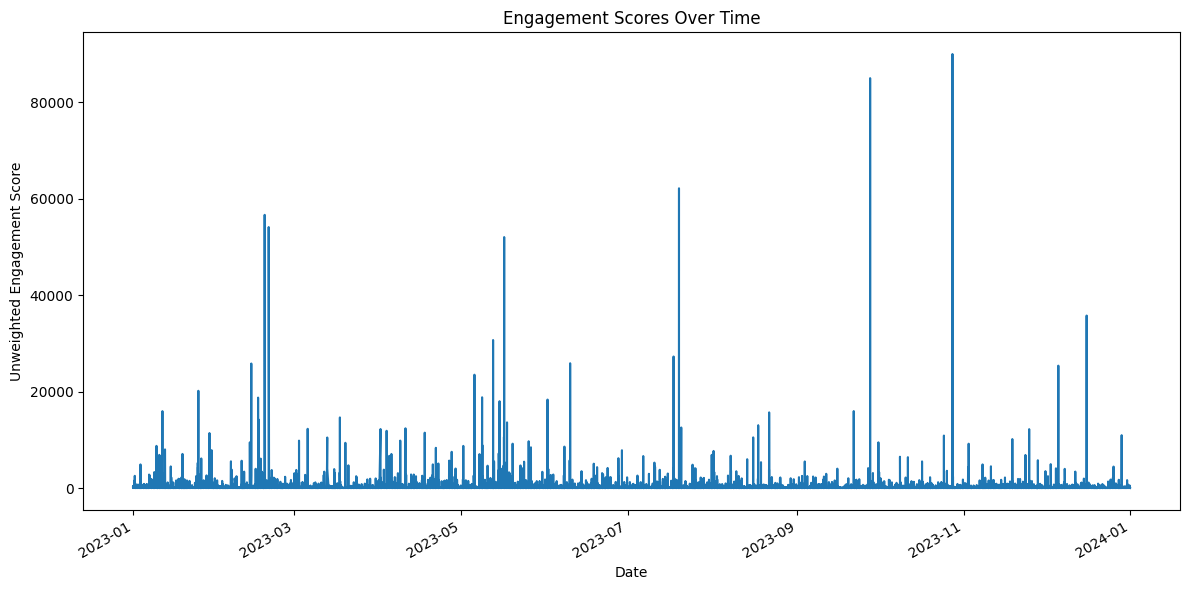

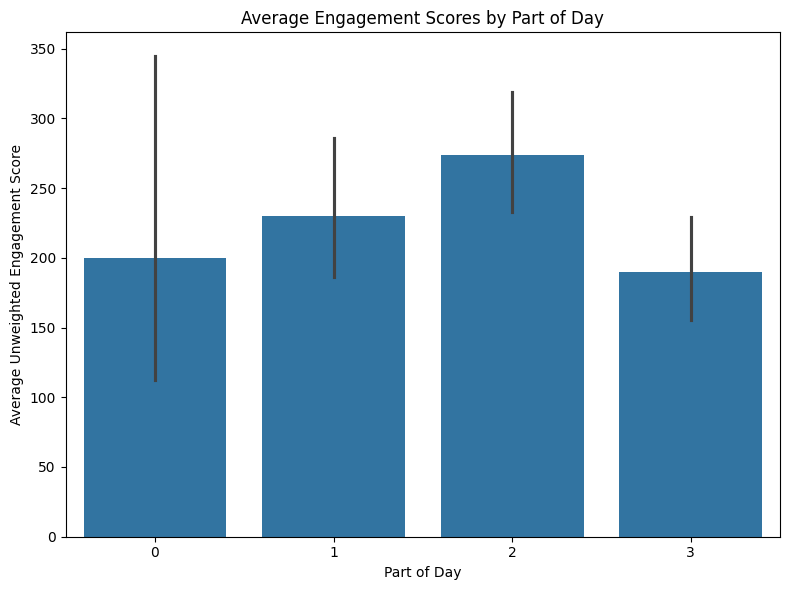

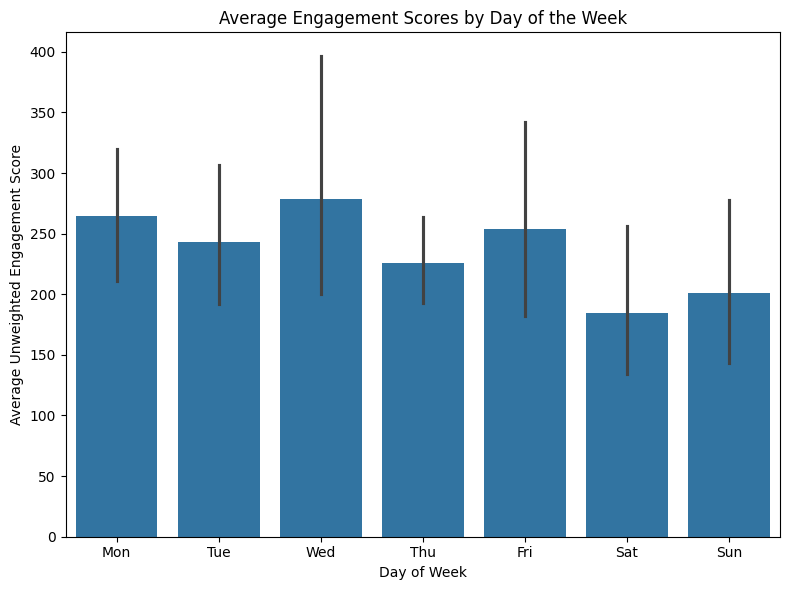

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'merged_df' is your DataFrame and it's already loaded

# Ensure 'Date' is a datetime type
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Plot 1: Engagement Over Time
plt.figure(figsize=(12, 6))
merged_df.set_index('Date')['Unweighted_Engagement_Score'].plot()
plt.title('Engagement Scores Over Time')
plt.ylabel('Unweighted Engagement Score')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

# Plot 2: Average Engagement Scores by Part of Day
plt.figure(figsize=(8, 6))
sns.barplot(x='Part of Day Numeric', y='Unweighted_Engagement_Score', data=merged_df, estimator=np.mean)
plt.title('Average Engagement Scores by Part of Day')
plt.ylabel('Average Unweighted Engagement Score')
plt.xlabel('Part of Day')
plt.tight_layout()
plt.show()

# For 'Day of the Week', assuming 0 = Monday, ..., 6 = Sunday
# Plot 3: Average Engagement Scores by Day of the Week
plt.figure(figsize=(8, 6))
sns.barplot(x='Day of Week', y='Unweighted_Engagement_Score', data=merged_df, estimator=np.mean)
plt.title('Average Engagement Scores by Day of the Week')
plt.ylabel('Average Unweighted Engagement Score')
plt.xlabel('Day of Week')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.tight_layout()
plt.show()


In [25]:
from scipy.stats import kruskal

# Example: Comparing engagement scores across three parts of the day
scores_morning = merged_df[merged_df['Part of Day Numeric'] == 0]['Unweighted_Engagement_Score'].dropna()
scores_afternoon = merged_df[merged_df['Part of Day Numeric'] == 1]['Unweighted_Engagement_Score'].dropna()
scores_evening = merged_df[merged_df['Part of Day Numeric'] == 2]['Unweighted_Engagement_Score'].dropna()
scores_nights = merged_df[merged_df['Part of Day Numeric'] == 3]['Unweighted_Engagement_Score'].dropna()

stat, p = kruskal(scores_morning, scores_afternoon, scores_evening)
print(f"Kruskal-Wallis H Test: Statistic={stat}, p-value={p}")


Kruskal-Wallis H Test: Statistic=7.715299850514214, p-value=0.02111756911991884


In [26]:
from scipy.stats import kruskal

# Example: Comparing engagement scores across three parts of the day
scores_monday = merged_df[merged_df['Day of Week'] == 0]['Unweighted_Engagement_Score'].dropna()
scores_tuesday = merged_df[merged_df['Day of Week'] == 1]['Unweighted_Engagement_Score'].dropna()
scores_wensday = merged_df[merged_df['Day of Week'] == 2]['Unweighted_Engagement_Score'].dropna()
scores_tursday = merged_df[merged_df['Day of Week'] == 3]['Unweighted_Engagement_Score'].dropna()
scores_friday = merged_df[merged_df['Day of Week'] == 4]['Unweighted_Engagement_Score'].dropna()
scores_saturday = merged_df[merged_df['Day of Week'] == 5]['Unweighted_Engagement_Score'].dropna()
scores_sunday = merged_df[merged_df['Day of Week'] == 6]['Unweighted_Engagement_Score'].dropna()

stat, p = kruskal(scores_monday, scores_tuesday, scores_wensday,scores_tursday, scores_friday, scores_saturday, scores_sunday)
print(f"Kruskal-Wallis H Test: Statistic={stat}, p-value={p}")

Kruskal-Wallis H Test: Statistic=23.7108096263238, p-value=0.0005902345562124145


In [29]:
merged_df

,Date,Profile,Message,Number of Reactions,Number of Shares,Number of Comments (primary),Number of Shares.1,Comments per post,Comments on posts by fans,Post interaction rate,...,Link,total_shares,Unweighted_Engagement_Score,text_length,hashtag_count,readability_score,emoji_count,Day of Week,Part of Day,Part of Day Numeric
0,2023-12-31 21:40:00,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16.0,0.0,2.0,2.0,2.0,2.0,"1,09E+12",...,https://www.facebook.com/617429960430190/posts...,2.0,8.250000,337,57,74.69,7,6,Evening,2
1,2023-12-31 20:01:00,Fun Spot America,See you next year! 😉 Don’t miss...,38.0,0.0,1.0,2.0,1.0,1.0,"4,17E+11",...,https://www.facebook.com/653224623510220/posts...,2.0,18.500000,141,19,87.72,3,6,Evening,2
2,2023-12-31 19:30:00,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23.0,0.0,2.0,3.0,2.0,2.0,"2,85E+11",...,https://www.facebook.com/653224623510220/posts...,3.0,12.250000,128,16,38.99,1,6,Evening,2
3,2023-12-31 19:00:00,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646.0,0.0,52.0,12.0,56.0,56.0,"1,36E+11",...,https://www.facebook.com/724434559725286/posts...,12.0,297.000000,45,8,48.47,3,6,Evening,2
4,2023-12-31 19:00:00,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17.0,0.0,2.0,0.0,2.0,2.0,"4,96E+11",...,https://www.facebook.com/562559642740100/posts...,0.0,11.666667,227,40,83.36,0,6,Evening,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15438,2023-01-01 02:00:00,Wild Adventures Theme Park,LAST CHANCE! \n\nPrices on 2023 Season Passes ...,20.0,0.0,1.0,0.0,2.0,2.0,"1,25E+11",...,https://www.facebook.com/WildAdventures/photos...,0.0,13.666667,190,32,85.99,0,6,Night,3
15439,2023-01-01 01:20:00,Playland,O Grupo Playcenter e os Parques Playcenter Fam...,7.0,0.0,1.0,0.0,1.0,1.0,"2,46E+09",...,https://www.facebook.com/170865866397863/posts...,0.0,5.000000,459,64,17.00,4,6,Night,3
15440,2023-01-01 00:01:00,Disneyland Paris,Gelukkig 2023! Laat de magie dit jaar stralen ...,833.0,0.0,40.0,31.0,44.0,44.0,"1,75E+12",...,https://www.facebook.com/652389081615295/posts...,31.0,381.250000,69,12,94.15,2,6,Night,3
15441,2023-01-01 00:00:00,Six Flags Over Georgia & Hurricane Harbor,What are your 2023 New Years resolutions? ✨\n\...,58.0,0.0,7.0,2.0,9.0,9.0,"1,42E+12",...,https://www.facebook.com/sixflagsovergeorgia/p...,2.0,29.000000,158,22,64.67,2,6,Night,3


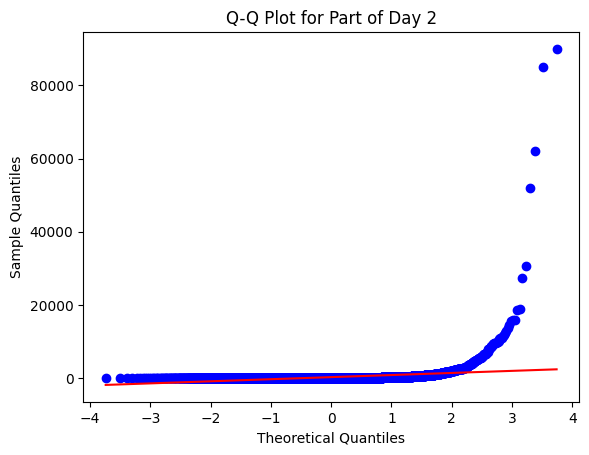

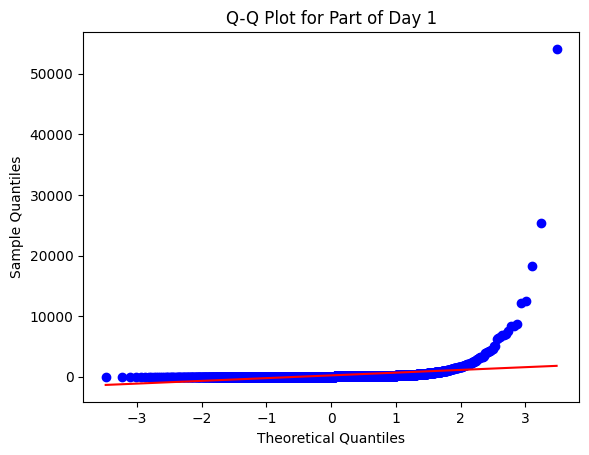

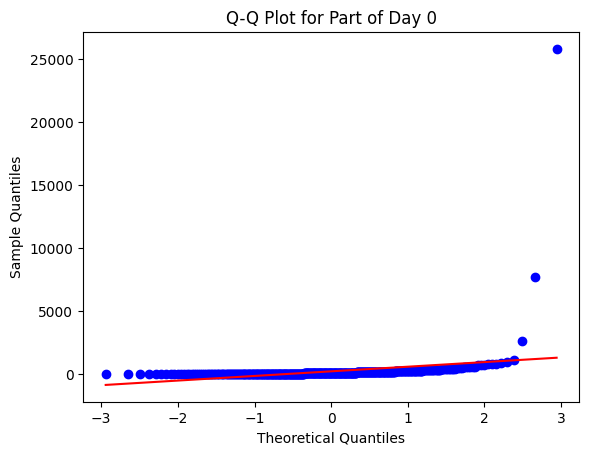

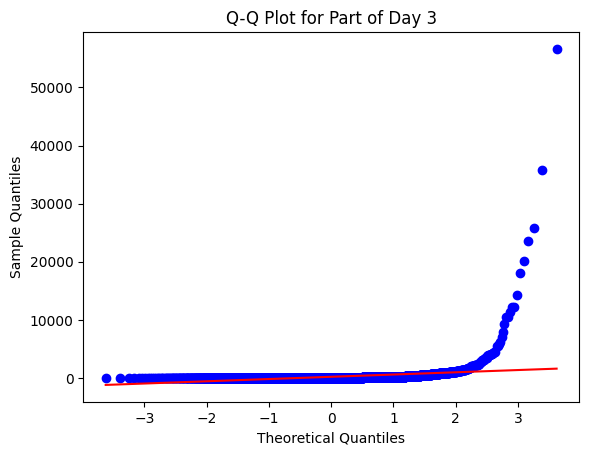

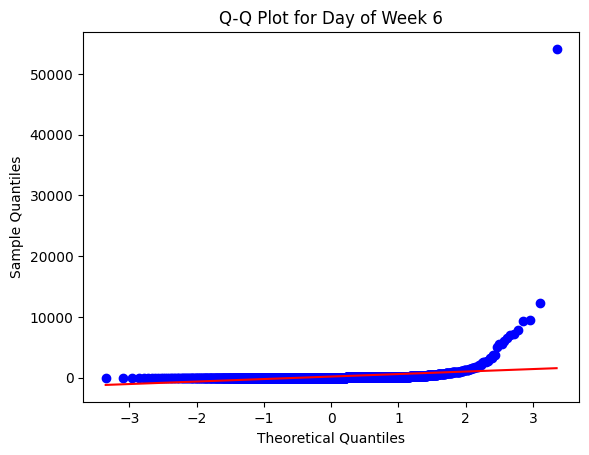

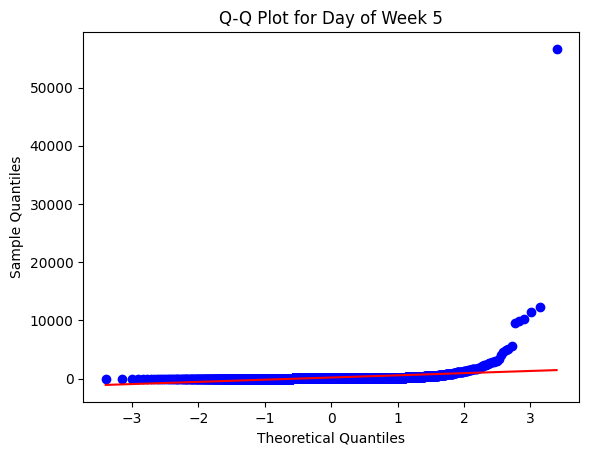

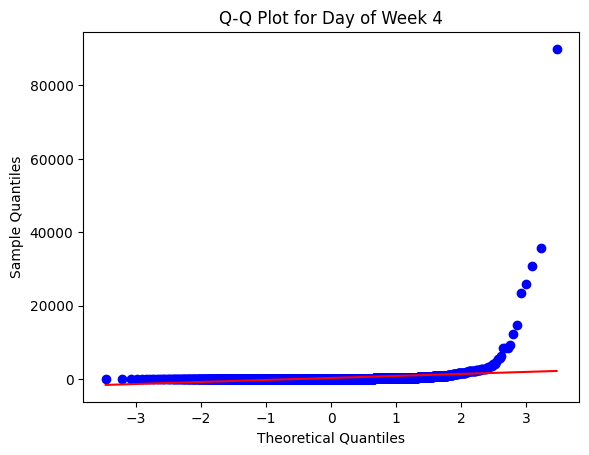

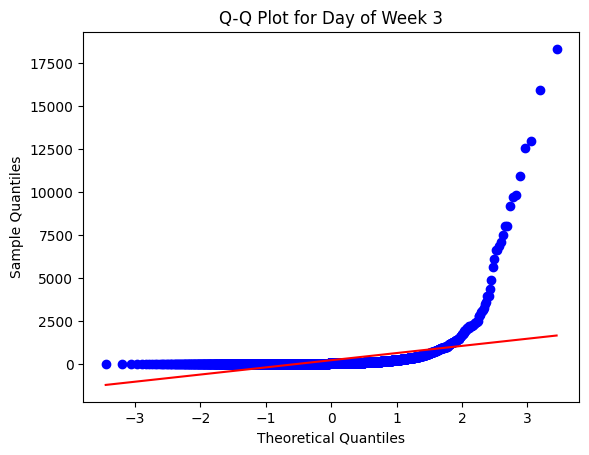

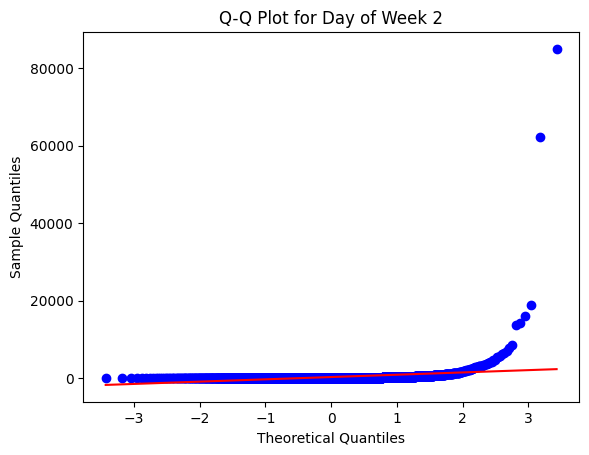

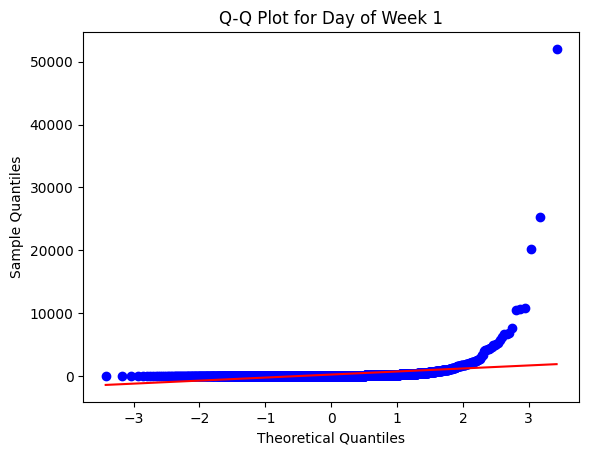

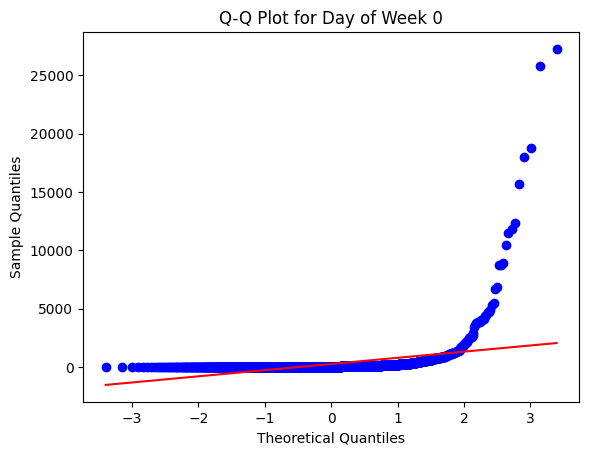

In [30]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Let's assume your 'merged_df' DataFrame is already loaded and has the columns mentioned.
# You may need to replace this line with the code that actually loads your data:
# merged_df = pd.read_csv('path_to_your_data.csv') or other DataFrame loading method

# Function to create and display Q-Q plots
def qq_plot(data, title):
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(title)
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.show()

# Q-Q plots for 'Unweighted_Engagement_Score' for each part of the day
for i in merged_df['Part of Day Numeric'].unique():
    scores = merged_df[merged_df['Part of Day Numeric'] == i]['Unweighted_Engagement_Score'].dropna()
    qq_plot(scores, f'Q-Q Plot for Part of Day {i}')

# Q-Q plots for 'Unweighted_Engagement_Score' for each day of the week
for i in merged_df['Day of Week'].unique():
    scores = merged_df[merged_df['Day of Week'] == i]['Unweighted_Engagement_Score'].dropna()
    qq_plot(scores, f'Q-Q Plot for Day of Week {i}')


### Sub_Question 3:

In [ ]:
#

### Sub_Question 4:

In [ ]:
#

In [ ]:
# Compute pairwise correlation of columns, excluding NA/null values
numeric_merged_df = merged_df.select_dtypes(include=[np.number])
print(numeric_merged_df.corr())

                              Number of Reactions  Number of Shares  \
Number of Reactions                      1.000000               NaN   
Number of Shares                              NaN               NaN   
Number of Comments (primary)             0.528398               NaN   
Number of Shares.1                       0.845981               NaN   
Comments per post                        0.498470               NaN   
Comments on posts by fans                0.498470               NaN   
Number of Likes                          0.963353               NaN   
Link-posts                                    NaN               NaN   
Picture Posts                                 NaN               NaN   
Video-posts                                   NaN               NaN   
total_shares                             0.845981               NaN   
Unweighted_Engagement_Score              0.995097               NaN   
text_length                             -0.054856               NaN   
hashta

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')

# Function to clean text
def clean_text(text):
    # Tokenize text and remove punctuation
    tokens = word_tokenize(text)
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # Remove non-alphabetic tokens and stopwords
    words = [word.lower() for word in stripped if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    return words

# Apply cleaning function to each comment
merged_df['cleaned_Message'] = merged_df['Message'].apply(clean_text)

merged_df

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/owenalberts/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/owenalberts/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Date,Profile,Message,Number of Reactions,Number of Shares,Number of Comments (primary),Number of Shares.1,Comments per post,Comments on posts by fans,Post interaction rate,...,total_shares,Unweighted_Engagement_Score,text_length,hashtag_count,readability_score,emoji_count,Day of Week,Part of Day,Part of Day Numeric,cleaned_Message
0,2023-12-31 21:40:00,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16.0,0.0,2.0,2.0,2.0,2.0,"1,09E+12",...,2.0,8.250000,337,57,74.69,7,6,Evening,2,"[today, final, day, use, season, passes, nt, m..."
1,2023-12-31 20:01:00,Fun Spot America,See you next year! 😉 Don’t miss...,38.0,0.0,1.0,2.0,1.0,1.0,"4,17E+11",...,2.0,18.500000,141,19,87.72,3,6,Evening,2,"[see, next, year, miss, huge, firework, displa..."
2,2023-12-31 19:30:00,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23.0,0.0,2.0,3.0,2.0,2.0,"2,85E+11",...,3.0,12.250000,128,16,38.99,1,6,Evening,2,"[nt, miss, huge, firework, display, fireworks,..."
3,2023-12-31 19:00:00,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646.0,0.0,52.0,12.0,56.0,56.0,"1,36E+11",...,12.0,297.000000,45,8,48.47,3,6,Evening,2,"[fijne, jaarwisseling, en, tot, volgend, jaar]"
4,2023-12-31 19:00:00,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17.0,0.0,2.0,0.0,2.0,2.0,"4,96E+11",...,0.0,11.666667,227,40,83.36,0,6,Evening,2,"[last, day, new, year, sale, save, tickets, ma..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15438,2023-01-01 02:00:00,Wild Adventures Theme Park,LAST CHANCE! \n\nPrices on 2023 Season Passes ...,20.0,0.0,1.0,0.0,2.0,2.0,"1,25E+11",...,0.0,13.666667,190,32,85.99,0,6,Night,3,"[last, chance, prices, season, passes, go, nt,..."
15439,2023-01-01 01:20:00,Playland,O Grupo Playcenter e os Parques Playcenter Fam...,7.0,0.0,1.0,0.0,1.0,1.0,"2,46E+09",...,0.0,5.000000,459,64,17.00,4,6,Night,3,"[grupo, playcenter, e, os, parques, playcenter..."
15440,2023-01-01 00:01:00,Disneyland Paris,Gelukkig 2023! Laat de magie dit jaar stralen ...,833.0,0.0,40.0,31.0,44.0,44.0,"1,75E+12",...,31.0,381.250000,69,12,94.15,2,6,Night,3,"[gelukkig, laat, de, magie, dit, jaar, stralen..."
15441,2023-01-01 00:00:00,Six Flags Over Georgia & Hurricane Harbor,What are your 2023 New Years resolutions? ✨\n\...,58.0,0.0,7.0,2.0,9.0,9.0,"1,42E+12",...,2.0,29.000000,158,22,64.67,2,6,Night,3,"[new, years, resolutions, shoutout, jenni, ive..."


In [ ]:
from nltk.probability import FreqDist

# Concatenate all cleaned comments into a single list
all_words = sum(merged_df['cleaned_Message'], [])

# Calculate frequency distribution
freq_dist = FreqDist(all_words)

# Display the most common words
print(freq_dist.most_common(10))


[('https', 4440), ('day', 2986), ('park', 2797), ('get', 2531), ('fun', 2336), ('season', 2258), ('tickets', 2008), ('us', 1994), ('pass', 1864), ('e', 1839)]


In [ ]:
from textblob import TextBlob

# Function to calculate sentiment
def calculate_sentiment(text):
    return TextBlob(' '.join(text)).sentiment.polarity

# Apply the function to cleaned comments
merged_df['Sentiment'] = merged_df['cleaned_Message'].apply(calculate_sentiment)

merged_df.head()


,Date,Profile,Message,Number of Reactions,Number of Shares,Number of Comments (primary),Number of Shares.1,Comments per post,Comments on posts by fans,Post interaction rate,...,Unweighted_Engagement_Score,text_length,hashtag_count,readability_score,emoji_count,Day of Week,Part of Day,Part of Day Numeric,cleaned_Message,Sentiment
0,2023-12-31 21:40:00,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16.0,0.0,2.0,2.0,2.0,2.0,"1,09E+12",...,8.250000,337,57,74.69,7,6,Evening,2,"[today, final, day, use, season, passes, nt, m...",0.307143
1,2023-12-31 20:01:00,Fun Spot America,See you next year! 😉 Don’t miss...,38.0,0.0,1.0,2.0,1.0,1.0,"4,17E+11",...,18.500000,141,19,87.72,3,6,Evening,2,"[see, next, year, miss, huge, firework, displa...",0.200000
2,2023-12-31 19:30:00,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23.0,0.0,2.0,3.0,2.0,2.0,"2,85E+11",...,12.250000,128,16,38.99,1,6,Evening,2,"[nt, miss, huge, firework, display, fireworks,...",0.400000
3,2023-12-31 19:00:00,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646.0,0.0,52.0,12.0,56.0,56.0,"1,36E+11",...,297.000000,45,8,48.47,3,6,Evening,2,"[fijne, jaarwisseling, en, tot, volgend, jaar]",0.000000
4,2023-12-31 19:00:00,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17.0,0.0,2.0,0.0,2.0,2.0,"4,96E+11",...,11.666667,227,40,83.36,0,6,Evening,2,"[last, day, new, year, sale, save, tickets, ma...",0.109091


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Join words back to form the string of comments
merged_df['Cleaned_Comment_Joined'] = merged_df['cleaned_Message'].apply(lambda x: ' '.join(x))

# Create a document-term matrix
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(merged_df['Cleaned_Comment_Joined'])

# LDA model
LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(dtm)

# Display topics
for index, topic in enumerate(LDA.components_):
    print(f'TOPIC #{index}')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')


TOPIC #0
['year', 'join', 'day', 'today', 'new', 'park', 'santa', 'holiday', 'christmas', 'https']


TOPIC #1
['weekend', 'park', 'summer', 'free', 'tickets', 'fun', 'pass', 'day', 'season', 'https']


TOPIC #2
['weekend', 'weather', 'happy', 'visit', 'open', 'ride', 'new', 'today', 'day', 'park']


TOPIC #3
['parque', 'um', 'em', 'você', 'que', 'play', 'com', 'diversao', 'para', 'playland']


TOPIC #4
['rescue', 'https', 'animal', 'sea', 'theaters', 'wish', 'world', 'animals', 'happy', 'disney']




import json
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import re

# Utility function definitions remain the same

def clean_post(text):
    """
    Utility function to clean post text by removing links, special characters
    using simple regex statements.
    """
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())

def get_post_sentiment(post):
    """
    Utility function to classify sentiment of passed post
    using textblob's sentiment method
    """
    analysis = TextBlob(clean_post(post))
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text, re.I)
    if match:
        return True
    return False

# Assuming 'merged_df' is already loaded with Facebook data

# Add a column for sentiment analysis
merged_df['sentiment'] = merged_df['Message'].apply(lambda post: get_post_sentiment(post))

# Assuming parks are identified in the 'Profile' column now
# The previous step of determining the park from 'Message' is no longer needed
# Therefore, we remove the loop that applies word_in_text for each park

# Update to count posts by park using 'Profile' directly
tweets_by_park = {park: merged_df[merged_df['Profile'].str.contains(park, case=False)].shape[0] for park in parks}

# Sentiment analysis by park, using 'Profile' for park identification
sent_by_park = merged_df.groupby(['Profile', 'sentiment']).size().groupby(level=0).transform(lambda x: x/x.sum()).unstack()
sent_by_park.plot(kind='barh', figsize=(10, 6))  # Change to 'barh' for horizontal bars
plt.title('Post Sentiment Proportions by Park')
plt.xlabel('Proportion')  # Adjusted for horizontal orientation
plt.ylabel('Park')  # Adjusted for horizontal orientation
plt.show()



/var/folders/r7/wflk5s9j1jx0y8082yq0zqs40000gn/T/ipykernel_8940/3986793807.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df['Sentiment'])


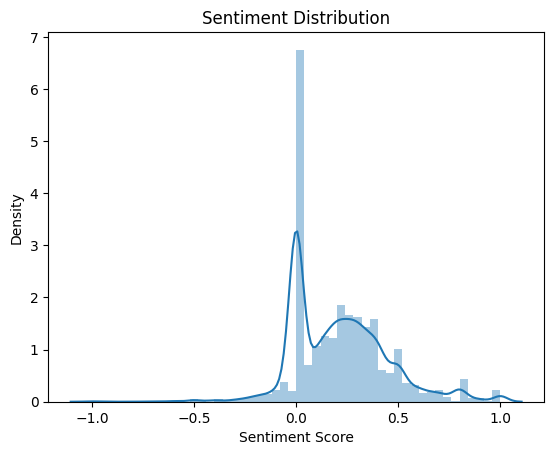

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# For example, plotting the distribution of sentiment
sns.distplot(merged_df['Sentiment'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.show()


In [ ]:
# Expanded lists of keywords for Events and Offers
events_keywords = [
    "show", "concert", "parade", "fireworks", "festival", "night", "celebration",
    "performance", "meet and greet", "magic show", "dinner show", "theme night",
    "character breakfast", "Halloween", "Christmas", "Easter", "summer nights",
    "live entertainment", "seasonal event", "autumn fest", "winter wonderland",
    "spring break", "character parade", "music festival", "carnival", "horror night",
    "family fun day", "superhero weekend", "princess day", "pyrotechnics", "theater show",
    "animal encounter", "educational tour", "VIP event", "special performance",
    "anniversary event", "new year's eve", "special celebration", "exclusive event",
    "fan meet-up"
]
 
offers_keywords = [
    "discount", "sale", "offer", "deal", "promotion", "early bird", "season pass",
    "family pack", "group rate", "flash sale", "special admission", "free entry",
    "buy one get one", "limited time offer", "exclusive access", "online booking discount",
    "ticket special", "membership discount", "upgrade promotion", "multi-day pass",
    "annual pass", "online discount", "kids go free", "holiday special", "weekend sale",
    "gift card offer", "last-minute deal", "early booking bonus", "companion discount",
    "birthday offer", "return visitor discount", "meal deal", "souvenir discount",
    "photo package deal", "stay and play", "hotel package", "resort special",
    "VIP package", "express pass deal"
]
 
# Function to check if any of the keywords appear in the text
def classify_text(text, keywords):
    if pd.isnull(text):  # Check if the text is NaN
        return 0
    text = text.lower()  # Convert text to lower case for comparison
    for keyword in keywords:
        if keyword in text:
            return 1
    return 0
 
# Apply the classification function to the dataset
merged_df['Event'] = merged_df['Message'].apply(lambda x: classify_text(x, events_keywords))
merged_df['Discount'] = merged_df['Message'].apply(lambda x: classify_text(x, offers_keywords))
 
# Display the first few rows of the updated dataframe
merged_df.head()
# Expanded lists of keywords for Events and... door Patrick Nasr-Alla

# Expanded lists of keywords for Events and Offers
events_keywords = [
    "show", "concert", "parade", "fireworks", "festival", "night", "celebration",
    "performance", "meet and greet", "magic show", "dinner show", "theme night",
    "character breakfast", "Halloween", "Christmas", "Easter", "summer nights",
    "live entertainment", "seasonal event", "autumn fest", "winter wonderland",
    "spring break", "character parade", "music festival", "carnival", "horror night",
    "family fun day", "superhero weekend", "princess day", "pyrotechnics", "theater show",
    "animal encounter", "educational tour", "VIP event", "special performance",
    "anniversary event", "new year's eve", "special celebration", "exclusive event",
    "fan meet-up"
]
 
offers_keywords = [
    "discount", "sale", "offer", "deal", "promotion", "early bird", "season pass",
    "family pack", "group rate", "flash sale", "special admission", "free entry",
    "buy one get one", "limited time offer", "exclusive access", "online booking discount",
    "ticket special", "membership discount", "upgrade promotion", "multi-day pass",
    "annual pass", "online discount", "kids go free", "holiday special", "weekend sale",
    "gift card offer", "last-minute deal", "early booking bonus", "companion discount",
    "birthday offer", "return visitor discount", "meal deal", "souvenir discount",
    "photo package deal", "stay and play", "hotel package", "resort special",
    "VIP package", "express pass deal"
]
 
# Function to check if any of the keywords appear in the text
def classify_text(text, keywords):
    if pd.isnull(text):  # Check if the text is NaN
        return 0
    text = text.lower()  # Convert text to lower case for comparison
    for keyword in keywords:
        if keyword in text:
            return 1
    return 0
 
# Apply the classification function to the dataset
merged_df['Event'] = merged_df['Message'].apply(lambda x: classify_text(x, events_keywords))
merged_df['Discount'] = merged_df['Message'].apply(lambda x: classify_text(x, offers_keywords))
 
# Display the first few rows of the updated dataframe
merged_df.head()
# Expanded lists of keywords for Events and... door Patrick Nasr-Alla

# Expanded lists of keywords for Events and Offers
events_keywords = [
    "show", "concert", "parade", "fireworks", "festival", "night", "celebration",
    "performance", "meet and greet", "magic show", "dinner show", "theme night",
    "character breakfast", "Halloween", "Christmas", "Easter", "summer nights",
    "live entertainment", "seasonal event", "autumn fest", "winter wonderland",
    "spring break", "character parade", "music festival", "carnival", "horror night",
    "family fun day", "superhero weekend", "princess day", "pyrotechnics", "theater show",
    "animal encounter", "educational tour", "VIP event", "special performance",
    "anniversary event", "new year's eve", "special celebration", "exclusive event",
    "fan meet-up"
]
 
offers_keywords = [
    "discount", "sale", "offer", "deal", "promotion", "early bird", "season pass",
    "family pack", "group rate", "flash sale", "special admission", "free entry",
    "buy one get one", "limited time offer", "exclusive access", "online booking discount",
    "ticket special", "membership discount", "upgrade promotion", "multi-day pass",
    "annual pass", "online discount", "kids go free", "holiday special", "weekend sale",
    "gift card offer", "last-minute deal", "early booking bonus", "companion discount",
    "birthday offer", "return visitor discount", "meal deal", "souvenir discount",
    "photo package deal", "stay and play", "hotel package", "resort special",
    "VIP package", "express pass deal"
]
 
# Function to check if any of the keywords appear in the text
def classify_text(text, keywords):
    if pd.isnull(text):  # Check if the text is NaN
        return 0
    text = text.lower()  # Convert text to lower case for comparison
    for keyword in keywords:
        if keyword in text:
            return 1
    return 0
 
# Apply the classification function to the dataset
merged_df['Event'] = merged_df['Message'].apply(lambda x: classify_text(x, events_keywords))
merged_df['Discount'] = merged_df['Message'].apply(lambda x: classify_text(x, offers_keywords))
 
# Display the first few rows of the updated dataframe
merged_df.head()

,Date,Profile,Message,Number of Reactions,Number of Shares,Number of Comments (primary),Number of Shares.1,Comments per post,Comments on posts by fans,Post interaction rate,...,emoji_count,Day of Week,Part of Day,Part of Day Numeric,cleaned_Message,Sentiment,Cleaned_Comment_Joined,sentiment,Event,Discount
0,2023-12-31 21:40:00,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16.0,0.0,2.0,2.0,2.0,2.0,"1,09E+12",...,7,6,Evening,2,"[today, final, day, use, season, passes, nt, m...",0.307143,today final day use season passes nt miss day ...,positive,1,1
1,2023-12-31 20:01:00,Fun Spot America,See you next year! 😉 Don’t miss...,38.0,0.0,1.0,2.0,1.0,1.0,"4,17E+11",...,3,6,Evening,2,"[see, next, year, miss, huge, firework, displa...",0.200000,see next year miss huge firework display tonig...,positive,1,0
2,2023-12-31 19:30:00,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23.0,0.0,2.0,3.0,2.0,2.0,"2,85E+11",...,1,6,Evening,2,"[nt, miss, huge, firework, display, fireworks,...",0.400000,nt miss huge firework display fireworks nye ne...,positive,1,0
3,2023-12-31 19:00:00,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646.0,0.0,52.0,12.0,56.0,56.0,"1,36E+11",...,3,6,Evening,2,"[fijne, jaarwisseling, en, tot, volgend, jaar]",0.000000,fijne jaarwisseling en tot volgend jaar,neutral,0,0
4,2023-12-31 19:00:00,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17.0,0.0,2.0,0.0,2.0,2.0,"4,96E+11",...,0,6,Evening,2,"[last, day, new, year, sale, save, tickets, ma...",0.109091,last day new year sale save tickets make new m...,positive,0,1


In [ ]:
output_file_path = '/Users/owenalberts/Downloads/dataframes.csv'  # Replace with the desired file path

# Save the DataFrame to a CSV file
merged_df.to_csv(output_file_path, index=False)  # Set index=False to avoid writing row indices to the file

print(f"File saved successfully to {output_file_path}")


File saved successfully to /Users/owenalberts/Downloads/dataframes.csv
